<a href="https://colab.research.google.com/github/rnjt13/RNN_using_different_word_encodings/blob/main/RNN_sentiment_analysis_using_integer_encoding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
  # sample data to see how tokenization works
  docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [4]:
# define out of vocabulary tokens as NA
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<NA>')

In [5]:
# convert words to token in docs
tokenizer.fit_on_texts(docs)
tokenizer.word_index

{'<NA>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [6]:
# check the frequency of words
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [7]:
# count of no. of sentences
tokenizer.document_count

10

In [8]:
# convert sequence of words to sequence of numbers in docs
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [11]:
# pad these seqeunces to a fixed max length
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

In [1]:
# Using this padded sequences as input to build a sentiment analysis model on imdb data
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, Flatten, SimpleRNN, Embedding

In [36]:
#load imdb data
(X_train,y_train), (X_test,y_test) = imdb.load_data()

In [37]:
X_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [38]:
# find max length of sentence
max_len = len(X_train[0])
print('max_length[0] = {}'.format(max_len))
for i in range(len(X_train)):
  if max_len< len(X_train[i]):
    max_len= len(X_train[i])
print('max_length = {}'.format(max_len))

max_length[0] = 218
max_length = 2494


In [39]:
# pad sequences to max 60 length
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)
# X_train = pad_sequences(X_train, maxlen=60, padding='post')
# X_test = pad_sequences(X_test, maxlen=60, padding='post')
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [40]:
#Build a simple RNN model on this integer encoded data
model = Sequential()

# Add a layer of SimpleRNN,
# input shape will be (50,1) as max_length of input is set as 50
# retyrn_sequences will be False as output after every timestamp is not required. [This is required in Entity recognition or Language translation]

model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid')) # as this is a binary classification problem
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
X_test[0]

array([  394,   354,     4,   123,     9,  1035,  1035,  1035,    10,
          10,    13,    92,   124,    89,   488,  7944,   100,    28,
        1668,    14,    31,    23,    27,  7479,    29,   220,   468,
           8,   124,    14,   286,   170,     8,   157,    46,     5,
          27,   239,    16,   179, 15387,    38,    32,    25,  7944,
         451,   202,    14,     6,   717], dtype=int32)

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
# type(y_test)
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6926 - accuracy: 0.5092 - val_loss: 0.6980 - val_accuracy: 0.5011
Epoch 2/5
782/782 [==============================] - 13s 17ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6945 - val_accuracy: 0.5010
Epoch 3/5
782/782 [==============================] - 17s 22ms/step - loss: 0.6928 - accuracy: 0.5033 - val_loss: 0.6949 - val_accuracy: 0.5012
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 0.6929 - accuracy: 0.5038 - val_loss: 0.6944 - val_accuracy: 0.5020
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6955 - val_accuracy: 0.5046


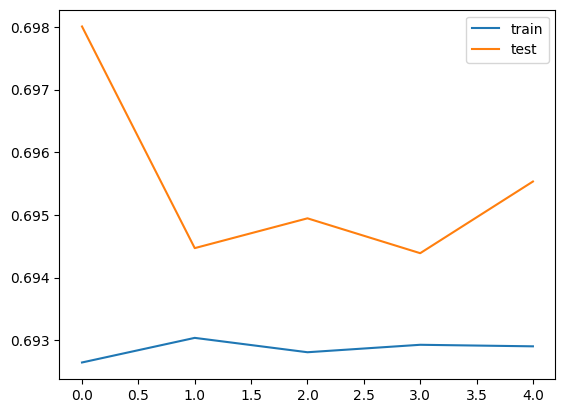

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

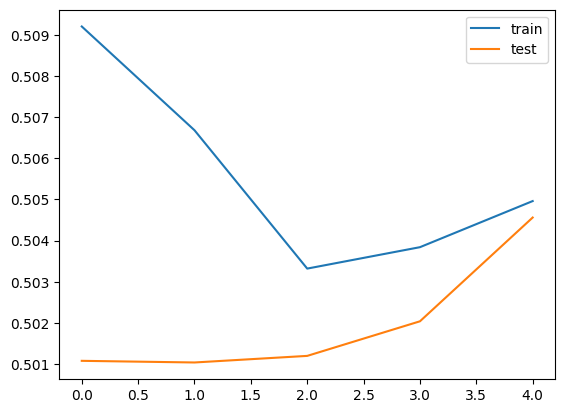

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()